In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data = ImageDataGenerator(rescale=1/255)
train_images = train_data.flow_from_directory('train' , target_size=(224, 224) , class_mode='sparse')

Found 1601 images belonging to 10 classes.


In [4]:
test_data = ImageDataGenerator(rescale=1/255)
test_images = test_data.flow_from_directory('test' , target_size=(224, 224) , class_mode='sparse')

Found 50 images belonging to 10 classes.


In [5]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import L1, L2

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=2048 , activation='relu'))
model.add(Dense(units=1024 , activation='relu'))
model.add(Dense(units=512 , activation='relu'))
model.add(Dense(units=256 , activation='relu'))
model.add(Dense(units=64 , activation='relu'))
model.add(Dense(units=10 , activation='softmax'))

C:\Users\Lenovo\Desktop\ML\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer=Adam(learning_rate=0.001) , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_images , validation_data=test_images , epochs=1)

51/51 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.8296 - loss: 0.4980 - val_accuracy: 0.7000 - val_loss: 1.0126


In [110]:
# verjum 1 epoch-a fit arac dra hamary history plot chi berum yndhanur 9 eopch-a

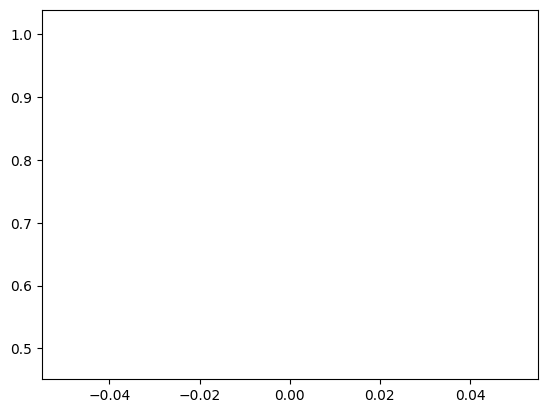

In [19]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

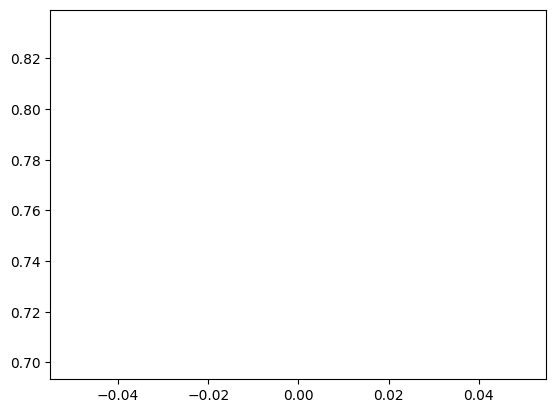

In [17]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

# 5 nkarneri testy

In [85]:
import matplotlib.image as mpimg
import cv2
import os

In [83]:
def generator(direction):
    dict_ = {0:'ALBERTS TOWHEE',
 1:'ALEXANDRINE PARAKEET',
 2:'ALPINE CHOUGH',
 3:'ALTAMIRA YELLOWTHROAT',
 4:'AMERICAN AVOCET',
 5:'AMERICAN BITTERN',
 6:'AMERICAN COOT',
 7:'AMERICAN FLAMINGO',
 8:'AMERICAN GOLDFINCH',
 9:'AMERICAN KESTREL'}

    
    img = mpimg.imread(direction)
    img = img / 255
    img = img.reshape(1, 224, 224, 3)
    pred = model.predict(img)
    pred = np.argmax(pred)

    return dict_[pred]
    

In [181]:
direction = 'valid/AMERICAN GOLDFINCH/1.jpg'
generator(direction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


'AMERICAN GOLDFINCH'

In [101]:
direction = 'valid/AMERICAN FLAMINGO//3.jpg'
generator(direction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


'AMERICAN FLAMINGO'

In [100]:
direction = 'valid/AMERICAN COOT//2.jpg'
generator(direction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


'AMERICAN COOT'

In [99]:
direction = 'valid/AMERICAN BITTERN//4.jpg'
generator(direction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


'AMERICAN BITTERN'

In [98]:
direction = 'valid/ALTAMIRA YELLOWTHROAT//3.jpg'
generator(direction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


'ALTAMIRA YELLOWTHROAT'

# ------------------------------------------------------

In [140]:
valid_data = ImageDataGenerator(rescale=1/255)
valid_images = valid_data.flow_from_directory('valid' , target_size=(224, 224) , class_mode='sparse', shuffle=False)

Found 50 images belonging to 10 classes.


In [141]:
pred = model.predict(valid_images)

C:\Users\Lenovo\Desktop\ML\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step


In [142]:
pred = [np.argmax(i) for i in pred]

In [149]:
valid = valid_images.classes

In [168]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, accuracy_score

In [157]:
cm = confusion_matrix(pred, valid)

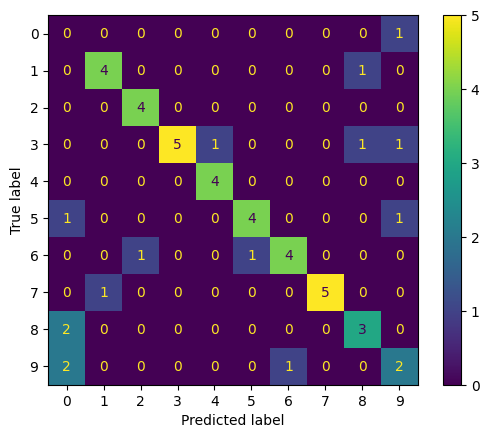

In [160]:
ConfusionMatrixDisplay(cm).plot()


In [172]:
accuracy_score(valid, pred)

0.7

In [182]:
from sklearn.metrics import classification_report

In [184]:
clas = classification_report(pred, valid)

In [185]:
print(clas)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      0.80      0.80         5
           2       0.80      1.00      0.89         4
           3       1.00      0.62      0.77         8
           4       0.80      1.00      0.89         4
           5       0.80      0.67      0.73         6
           6       0.80      0.67      0.73         6
           7       1.00      0.83      0.91         6
           8       0.60      0.60      0.60         5
           9       0.40      0.40      0.40         5

    accuracy                           0.70        50
   macro avg       0.70      0.66      0.67        50
weighted avg       0.78      0.70      0.73        50

